<a href="https://colab.research.google.com/github/Mohamed-Khalil67/Deep-Learning/blob/main/Deep_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mouting sur google en mettre disponibilité en access

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 28.8 MB/s 
     |████████████████████████████████| 46 kB 2.0 MB/s 
     |████████████████████████████████| 1.2 MB 51.8 MB/s 
     |████████████████████████████████| 189 kB 64.2 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 51 kB 378 kB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.163271,0.027907,0.007442,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.053179,0.015656,0.006089,00:55


In [4]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


What si Machine learning?

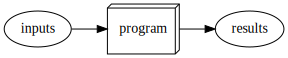

In [8]:
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

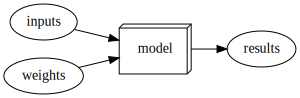

In [9]:
#caption A program using weight assignment
#id weight_assignment
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

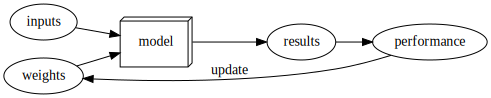

In [10]:
#caption Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

Jargon deep learning

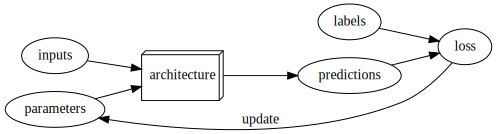

In [11]:
#caption Detailed training loop
#id detailed_loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

In [12]:
from fastai.vision.all import *

In [13]:
path = untar_data(URLs.PETS)/'images'

In [14]:
def is_cat(x): return x[0].isupper()

In [15]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

The Pet dataset contains 7,390 pictures of dogs and cats, consisting of 37 different breeds. Each image is labeled using its filename: for instance the file great_pyrenees_173.jpg is the 173rd example of an image of a Great Pyrenees breed dog in the dataset. The filenames start with an uppercase letter if the image is a cat, and a lowercase letter otherwise. We have to tell fastai how to get labels from the filenames, which we do by calling from_name_func (which means that labels can be extracted using a function applied to the filename), and passing is_cat, which returns x[0].isupper(), which evaluates to True if the first letter is uppercase (i.e., it's a cat).

The most important parameter to mention here is valid_pct=0.2. This tells fastai to hold out 20% of the data and not use it for training the model at all. This 20% of the data is called the validation set; the remaining 80% is called the training set. The validation set is used to measure the accuracy of the model. By default, the 20% that is held out is selected randomly. The parameter seed=42 sets the random seed to the same value every time we run this code, which means we get the same validation set every time we run it—this way, if we change our model and retrain it, we know that any differences are due to the changes to the model, not due to having a different random validation set.

fastai will always show you your model's accuracy using only the validation set, never the training set. This is absolutely critical, because if you train a large enough model for a long enough time, it will eventually memorize the label of every item in your dataset! The result will not actually be a useful model, because what we care about is how well our model works on previously unseen images. That is always our goal when creating a model: for it to be useful on data that the model only sees in the future, after it has been trained.

Even when your model has not fully memorized all your data, earlier on in training it may have memorized certain parts of it. As a result, the longer you train for, the better your accuracy will get on the training set; the validation set accuracy will also improve for a while, but eventually it will start getting worse as the model starts to memorize the training set, rather than finding generalizable underlying patterns in the data. When this happens, we say that the model is overfitting.

<> shows what happens when you overfit, using a simplified example where we have just one parameter, and some randomly generated data based on the function x**2. As you can see, although the predictions in the overfit model are accurate for data near the observed data points, they are way off when outside of that range.

Deep Learning image classifying

In [16]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.131614,2.294157,00:02


epoch,train_loss,valid_loss,time
0,1.934519,1.443272,00:02
1,1.648986,1.431195,00:02
2,1.515621,1.188276,00:02
3,1.392946,0.978784,00:02
4,1.280649,0.868404,00:02
5,1.179617,0.805048,00:02
6,1.092858,0.779674,00:02
7,1.022732,0.768279,00:02


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


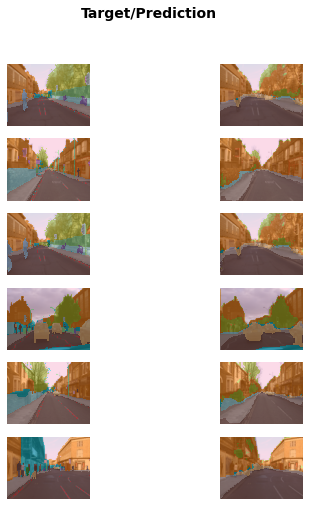

In [17]:
learn.show_results(max_n=6, figsize=(7,8))

In [18]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.463516,0.396687,0.821480,03:30


epoch,train_loss,valid_loss,accuracy,time
0,0.304543,0.243320,0.900480,06:55
1,0.236623,0.214379,0.919680,06:56
2,0.192257,0.202868,0.923400,06:56
3,0.145277,0.192715,0.929480,06:55


In [19]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([2.1542e-04, 9.9978e-01]))

In [20]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.462235,0.400566,0.822120,03:30


epoch,train_loss,valid_loss,accuracy,time
0,0.308990,0.241663,0.903040,06:55
1,0.240050,0.212997,0.920440,06:54
2,0.178138,0.190216,0.927880,06:55
3,0.141415,0.192451,0.929920,06:55
